# Xuemei Chen HW2

## Problem A

In [2]:
import numpy as np

In [3]:
# return the REF of any m by n matrix A
def REF(A):
    m, n = A.shape
    RowInd = 0  # this keeps track of how many columns are skipped, or the difference between col and row idx
    for j in range(n): #at column j
        if np.allclose(A[j-RowInd:,j],np.zeros(m-j+RowInd)) == 1: #if that column is zero column
            RowInd = RowInd + 1             
        if np.allclose(A[j-RowInd:,j],np.zeros(m-j+RowInd)) == 0:  # if that column is not zero column 
            Idx = np.where(A[j-RowInd:,j]!=0)[0][0] + j-RowInd # row index of the pivot
            if Idx != j - RowInd: # perform a swap
                temp = np.copy(A[Idx,:])
                A[Idx,:] = A[j-RowInd,:]
                A[j-RowInd,:] = temp
                
            for i in range(j-RowInd+1, m): # perform elimination
                c = A[i,j]/A[j-RowInd,j]
                A[i,j:] = -c * A[j-RowInd,j:] + A[i,j:]
            #print(A)    
    return A        

(a) Test on HW1-7

In [4]:
A = np.array([[2,2,2],[-2,5,2],[8,1,4]]); print(A)

[[ 2  2  2]
 [-2  5  2]
 [ 8  1  4]]


In [5]:
REF(A)
# for REF_basic, there should be an error

array([[2, 2, 2],
       [0, 7, 4],
       [0, 0, 0]])

(b) Test on 

In [6]:
C = np.array([[1,2,3,4,6], [1,2, 5, 2,-2], [1, 1, 5, 5,1], [1, 4, 1, 5, 0]])

In [7]:
REF(C)

array([[ 1,  2,  3,  4,  6],
       [ 0, -1,  2,  1, -5],
       [ 0,  0,  2, -2, -8],
       [ 0,  0,  0,  5, -8]])

## Problem B

Copy my BackSub from HW1

In [8]:
# solve Ax=b where A is upper triangular and invertible
def BackSub(A,b):
    m, n = A.shape
    l = len(b)
    if m!=n:
        raise ValueError('The matrix needs to be square')
    if m!=l:
        raise ValueError('Dimensions of A and b do not match.')
    if np.allclose(A, np.triu(A)) == 0: #if not upper triangular
        raise ValueError('A is not upper triangular')
    
    x = np.zeros(n)
    for i in range(n-1,-1,-1): #solve backwards
        if A[i,i] == 0:
            raise ValueError('Your A is not invertible.')
        x[i] = (b[i] - np.sum(x[i+1:]*A[i,i+1:]))/A[i,i]
    return x

In [9]:
# Solve Ax=b when $A$ is invertible
def MySolve(A,b):
    m,n = A.shape
    Reduced = REF(np.hstack((A,b.reshape(n,1)))) 
    return BackSub(Reduced[:,:n], Reduced[:,-1])

Some tests

In [10]:
n = 5
A = np.random.randn(n,n)
b = np.random.randn(n)

In [11]:
np.allclose(MySolve(A,b).reshape(n), np.linalg.solve(A,b).reshape(n))

True

## Problem C

Lets computationally test the complexity of your MySolve(A, b).  Do so by doing 10 runs of random matrices of size $2^k$, for $k =0,...,10$. Let $T_k$ = average time for a matrix of size $2^k$. Plot the $\log_2(T_k)$ against $k$.  How can we tell the leading order complexity from this plot, i.e. why does this plot show exactly that?

In [12]:
import timeit
from tqdm import tqdm  #pip install tqdm

In [23]:
main_s = timeit.default_timer()
nk = 11 # k = 0,...,10
ni = 7
Tm = np.zeros([nk,ni])
for k in tqdm(range(nk)):
    for i in range(ni):
        
        A = np.random.randn(2**k, 2**k)
        b = np.random.randn(2**k)
        start = timeit.default_timer()   
        MySolve(A,b)                 #only measure MySolve
        #np.linalg.solve(A,b)
        stop = timeit.default_timer()
        Tm[k,i] = stop - start
main_e = timeit.default_timer()
print(main_e - main_s)


100%|██████████| 11/11 [00:24<00:00,  2.25s/it]


24.74757091095671


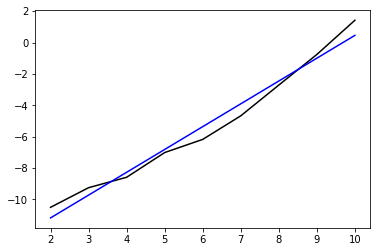

In [25]:
import matplotlib.pyplot as plt
m,b = np.polyfit(np.arange(2,nk), np.log2(np.mean(Tm, axis=1))[2:],1) # find the slope by polyfit. 
x = np.arange(2,nk)
plt.plot(x, np.log2(np.mean(Tm, axis=1))[2:],'k',x,m*x+b,'b')

plt.show()

In [26]:
m

1.4559168070180577

### Reasoning

If run time is $cn^d$, where $n=2^k$, then $\log_2(cn^d)=\log_2(c)+\log_2(2^{kd})=constant + dk$. So the slope of the plot is $d$ in $O(n^d)$

Therefore the complexity is about $O(n^{1.5})$ according to this plot.

However, it is well known that Gaussian Elimination takes $O(n^3)$. Why do I have 1.5? It is usually due to inaccuracy for relatively small $n$. I will redo Problem C below for k all the way to 14.

In [16]:
main_s = timeit.default_timer()
nk = 15 # k = 0,...,14
ni = 7
T = np.zeros([nk,ni])
for k in tqdm(range(nk)):
    for i in range(ni):
        
        A = np.random.randn(2**k, 2**k)
        b = np.random.randn(2**k)
        start = timeit.default_timer()   
        #MySolve(A,b)                 #only measure MySolve
        np.linalg.solve(A,b)
        stop = timeit.default_timer()
        T[k,i] = stop - start
main_e = timeit.default_timer()
print(main_e - main_s)

100%|██████████| 15/15 [10:43<00:00, 42.92s/it]

643.7682242520386


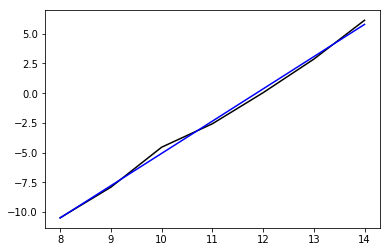

In [19]:
import matplotlib.pyplot as plt
m,b = np.polyfit(np.arange(8,nk), np.log2(np.mean(T, axis=1))[8:],1) # find the slope by polyfit. 
x = np.arange(8,nk)
plt.plot(x, np.log2(np.mean(T, axis=1))[8:],'k',x,m*x+b,'b')

plt.show()

In [20]:
# slope of the above plot
m

2.713311269172956

This is behaving like $O(n^3)$.